
# Real-Time Communication System Powered By AI For Specially Abled


# TEAM ID - 2022TMID52086

Image Preprocessing

Import ImageDataGenerator Library And Configure It

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

Apply ImageDataGenerator Functionality To Train And Test Set

In [ ]:
x_train=train_datagen.flow_from_directory(r"C:\Users\rajes\Desktop\Dataset\training_set",target_size=(64,64),
                                          class_mode="categorical",batch_size=30)

Found 15750 images belonging to 9 classes.


In [ ]:
x_test=test_datagen.flow_from_directory(r"C:\Users\rajes\Desktop\Dataset\test_set",target_size=(64,64),
                                                            class_mode="categorical",batch_size=30)

Found 2250 images belonging to 9 classes.


Model  Building

Import The Required Model Building Libraries

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

Initialize The Model

In [ ]:
model=Sequential()

Add The Convolution Layer

In [ ]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))
#No of feature detectors, size of feature detector, image size, activation function

Add The Pooling Layer

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

Add The Flatten Layer

In [ ]:
model.add(Flatten())

Adding The Dense Layers

In [ ]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [ ]:
model.add(Dense(9,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 300)               9225900   
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 9)                 1359      
                                                        

Compile The Model

In [ ]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [ ]:
len(x_train)

525

In [ ]:
len(x_test)

75

In [ ]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

Fit And Save The Model

In [ ]:
model.fit(x_train,epochs=12,validation_data=x_test,steps_per_epoch=len(x_train),validation_steps=len(x_test))

Epoch 1/12
525/525 [==============================] - 291s 553ms/step - loss: 0.2858 - accuracy: 0.9045 - val_loss: 0.2504 - val_accuracy: 0.9356
Epoch 2/12
525/525 [==============================] - 129s 245ms/step - loss: 0.0642 - accuracy: 0.9799 - val_loss: 0.1858 - val_accuracy: 0.9769
Epoch 3/12
525/525 [==============================] - 133s 254ms/step - loss: 0.0381 - accuracy: 0.9872 - val_loss: 0.1691 - val_accuracy: 0.9791
Epoch 4/12
525/525 [==============================] - 130s 247ms/step - loss: 0.0296 - accuracy: 0.9907 - val_loss: 0.2054 - val_accuracy: 0.9778
Epoch 5/12
525/525 [==============================] - 164s 312ms/step - loss: 0.0181 - accuracy: 0.9928 - val_loss: 0.1751 - val_accuracy: 0.9684
Epoch 6/12
525/525 [==============================] - 164s 312ms/step - loss: 0.0239 - accuracy: 0.9922 - val_loss: 0.1724 - val_accuracy: 0.9827
Epoch 7/12
525/525 [==============================] - 133s 253ms/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.1658 -

In [ ]:
model.save("C:/Users/rajes/Downloads/signlanguage-new.h5")

Test the Model

Import The Packages And Load The Saved Model

In [ ]:
from keras.models import load_model
import numpy as np
import h5py
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np

In [ ]:
model = load_model("C:/Users/rajes/Downloads/signlanguage-new.h5")

Load The Test Image, Pre-Process It And Predict

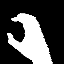

In [ ]:
img =image.load_img(r"C:\Users\rajes\Desktop\Dataset\test_set\c\4.png",target_size = (64,64,1))
img

In [ ]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("THE PREDICTED LETTER IS ",op[pred])

In [ ]:
from skimage.transform import resize
def detect(frame):
    img=resize(frame,(64,64,1))
    img=np.expand_dims(img,axis=0)
    if(np.max(img)>1):
        img=img/255.0
        prediction=model.predict(img)
        print(prediction)
        prediction=model.predict_classes(img)
        print(prediction)

In [ ]:
frame=cv2.imread(r"C:\Users\rajes\Desktop\Dataset\test_set\A\8.png")
data=detect(frame)

In [ ]:
type(img)

PIL.Image.Image

In [ ]:
x = image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(64, 64, 3)

In [ ]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [ ]:
pred_prob = model.predict(x)

1/1 [==============================] - 0s 26ms/step


In [ ]:
pred_prob

array([[0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
class_name=["A","B","C","D","E","F","G","H","I"]
pred_id = pred_prob.argmax(axis=1)[0]

In [ ]:
pred_id

2

In [ ]:
print("the alphabet is  ",str(class_name[pred_id]))

the alphabet is   C


CNN Video Anlaysis

In [ ]:
background = None
accumulated_weight = 0.5

ROI_top = 100
ROI_bottom = 300
ROI_right = 150
ROI_left = 350

In [ ]:
word_dict = { 0:'A', 1:'B',  2:'C', 3: 'D', 4:'E', 5:'F', 6:'G',7:'H', 8:'I' }
'''
predictions = model.predict(imgs, verbose=0)
print("predictions on a small set of test data--")
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')

plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')'''

'\npredictions = model.predict(imgs, verbose=0)\nprint("predictions on a small set of test data--")\nprint("")\nfor ind, i in enumerate(predictions):\n    print(word_dict[np.argmax(i)], end=\'   \')\n\nplotImages(imgs)\nprint(\'Actual labels\')\nfor i in labels:\n    print(word_dict[np.argmax(i)], end=\'   \')'

In [ ]:
def cal_accum_avg(frame, accumulated_weight):

    global background
    
    if background is None:
        background = frame.copy().astype("float")
        return None

    cv2.accumulateWeighted(frame, background, accumulated_weight)

In [ ]:
def segment_hand(frame, threshold=25):
    global background
    diff = cv2.absdiff(background.astype("uint8"), frame)
    _ , thresholded = cv2.threshold(diff, threshold,255,cv2.THRESH_BINARY)
    #Fetching contours in the frame (These contours can be of hand or any other object in foreground) …
    contours, hierarchy =cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    # If length of contours list = 0, means we didn't get any contours...
    if len(contours) == 0:
        return None
    else:
        # The largest external contour should be the hand 
        hand_segment_max_cont = max(contours, key=cv2.contourArea)
        
        # Returning the hand segment(max contour) and the thresholded image of hand...
        return (thresholded, hand_segment_max_cont)

In [ ]:
cam = cv2.VideoCapture(0)
num_frames =0
while True:
    ret, frame = cam.read()
    # flipping the frame to prevent inverted image of captured frame...
    frame = cv2.flip(frame, 1)
    frame_copy = frame.copy()
    # ROI from the frame
    roi = frame[ROI_top:ROI_bottom, ROI_right:ROI_left]
    gray_frame = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    gray_frame = cv2.GaussianBlur(gray_frame, (9, 9), 0)
    if num_frames < 70:
        cal_accum_avg(gray_frame, accumulated_weight)
        cv2.putText(frame_copy, "FETCHING BACKGROUND...PLEASE WAIT",(80, 400),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2)
    else: 
        # segmenting the hand region
        hand = segment_hand(gray_frame)
        # Checking if we are able to detect the hand...
        if hand is not None:
            thresholded, hand_segment = hand
            # Drawing contours around hand segment
            cv2.drawContours(frame_copy, [hand_segment + (ROI_right,ROI_top)],
                             -1, (255, 0, 0),1)
            cv2.imshow("Thesholded Hand Image", thresholded)
            thresholded = cv2.resize(thresholded, (64, 64))
            thresholded = cv2.cvtColor(thresholded, cv2.COLOR_GRAY2RGB)
            thresholded = np.reshape(thresholded,(1,thresholded.shape[0],thresholded.shape[1],3))
            pred = model.predict(thresholded)
            cv2.putText(frame_copy, word_dict[np.argmax(pred)],(170, 45), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
                
    # Draw ROI on frame_copy
    cv2.rectangle(frame_copy, (ROI_left, ROI_top), 
                  (ROI_right,ROI_bottom), (255,128,0), 3)
    # incrementing the number of frames for tracking
    num_frames += 1
    # Display the frame with segmented hand
    cv2.putText(frame_copy, "Hand sign recognition",
    (10, 20), cv2.FONT_ITALIC, 0.5, (51,255,51), 1)
    cv2.imshow("Sign Detection", frame_copy)
    # Close windows with Esc
    k = cv2.waitKey(1) & 0xFF
    if k == 'q':
        break

# Release the camera and destroy all the windows
cam.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 30ms/step
